<a href="https://colab.research.google.com/github/LuluAlm/ML_Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Supermarket Sales Prediction**

      by Lulu Almasoud





Brief description: The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.
 it's contained 1000 Instances 17 features.
This dataset used for predictive data analytics purpose.
> The data source : (https://www.kaggle.com/code/aryantiwari123/supermarket-sales-prediction) .









#**Importing the needed libraries**


In [ ]:
#First of all, I will import all the necessary libraries that we will use throughout the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import StandardScaler,MinMaxScaler


#**1-Data Cleaning**

**Loading The Dataset**

In [ ]:
#import dataset
df= pd.read_csv("/content/supermarket_sales - Sheet1 (1).csv")
pd

<module 'pandas' from '/usr/local/lib/python3.10/dist-packages/pandas/__init__.py'>

In [ ]:
# Explore the data, WIll be Display the first 5 Rows
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
#Check the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
#check the shape of DataFram (row's,columns)
df.shape

(1000, 17)

In [ ]:
#count value in specific column (Branch)
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [ ]:
#count value in specific column (city)
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [ ]:
#count value in specific column (Paymenty)
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [ ]:
#some statistical information about the dataframe

df.describe()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


**Checking if there are any missing values**

In [ ]:
#Check if duplicated in data
df.duplicated().sum()

0

In [ ]:
#Get the sum of null values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

*No missing value*

In [ ]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
#rename columns
df.rename({'Invoice ID':'Invoice Number'},axis=1,inplace=True)


In [ ]:
# Show column after rename
df.head()

,Invoice Number,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
#Count  the number of distinct elements in Prouduct line
df['Product line'].nunique()

6

## Correlation Matrix

 **A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set**

Text(0.5, 1.0, 'Correlation Heatmap')

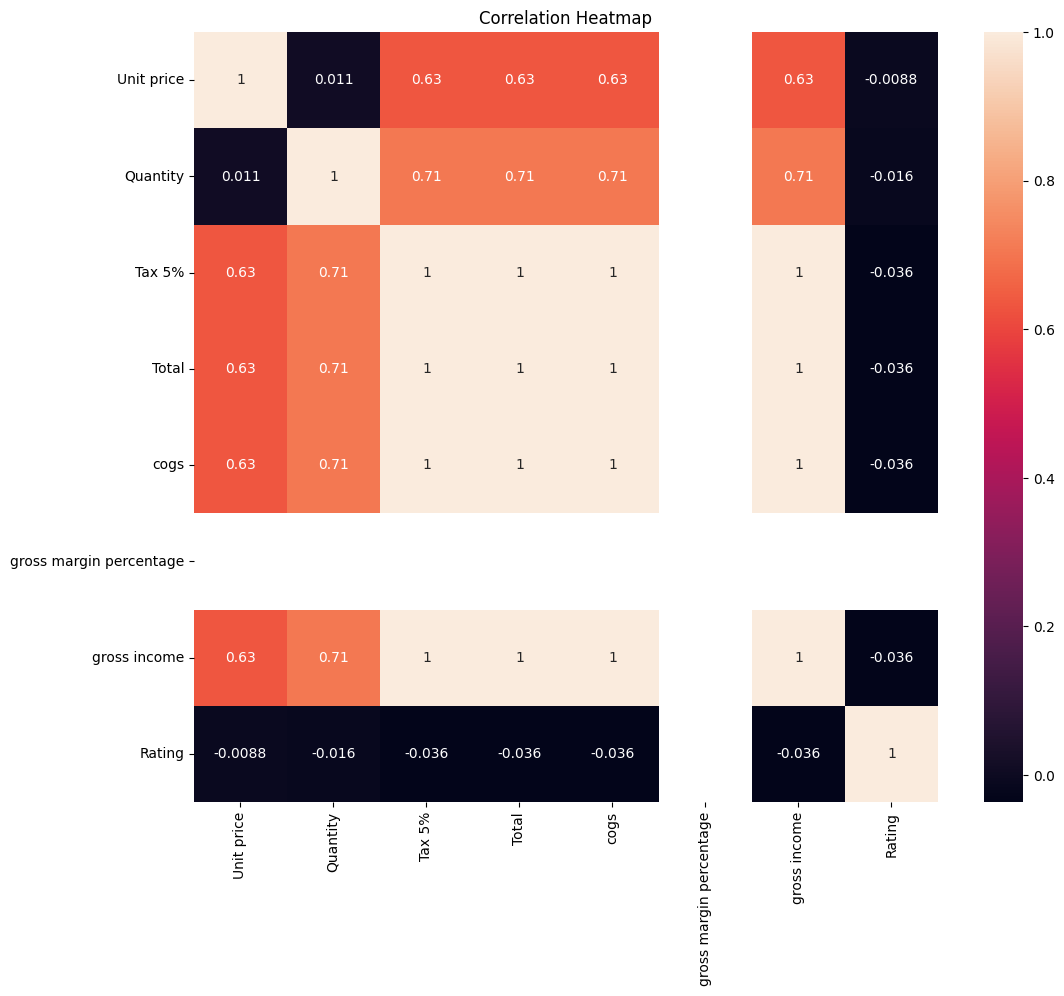

In [ ]:
#Heatmap using Seaborn
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot =True)
plt.title('Correlation Heatmap')

#2-Data Processing

##Normalizaton

**makes it easy for the data to be processed for modeling**

In [ ]:
#Normalization of Float Value Colmuns
scaler=StandardScaler()
cols_to_normalize=['Unit price','Quantity','Tax 5%','Total','cogs','Rating','gross income']

scaled_df=scaler.fit(df[cols_to_normalize])
df[cols_to_normalize] = scaler.transform(df[cols_to_normalize])



In [ ]:
min_max_scaler=MinMaxScaler()
df[cols_to_normalize] = min_max_scaler.fit_transform(df[cols_to_normalize])

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.507256,0.501111,0.302613,0.302613,0.302613,4.761905,0.302613,0.49545
std,0.294778,0.324826,0.238268,0.238268,0.238268,0.000000,0.238268,0.28643
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.761905,0.000000,0.00000
25%,0.253616,0.222222,0.110220,0.110220,0.110220,4.761905,0.110220,0.25000
50%,0.502336,0.444444,0.235636,0.235636,0.235636,4.761905,0.235636,0.50000
75%,0.754951,0.777778,0.446400,0.446400,0.446400,4.761905,0.446400,0.75000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.761905,1.000000,1.00000


#3-Data Visualisation

In [ ]:
#Graph shows count of females and males

print(df.shape)
df['Gender'].value_counts()

(1000, 17)


Female    501
Male      499
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

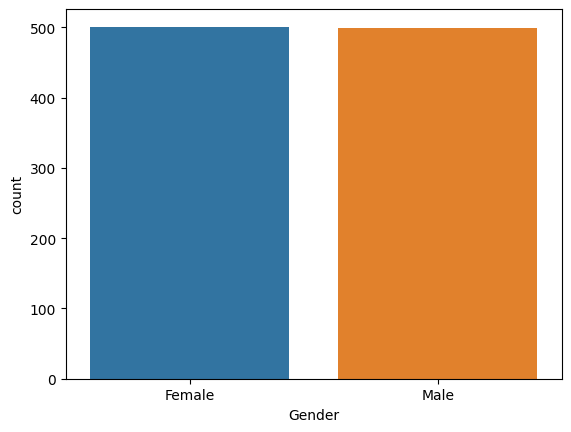

In [ ]:
sns.countplot(x='Gender' , data = df )
#Is almost same

##Scatterplot

<Axes: xlabel='Unit price', ylabel='Total'>

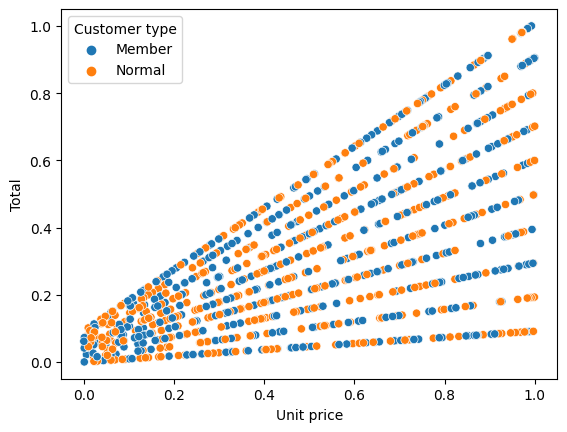

In [ ]:
#Use Scatter plots to observe relationship between variables
sns.scatterplot(data=df,x='Unit price',y='Total',hue ='Customer type' )

##Boxplot

<Axes: xlabel='gross income'>

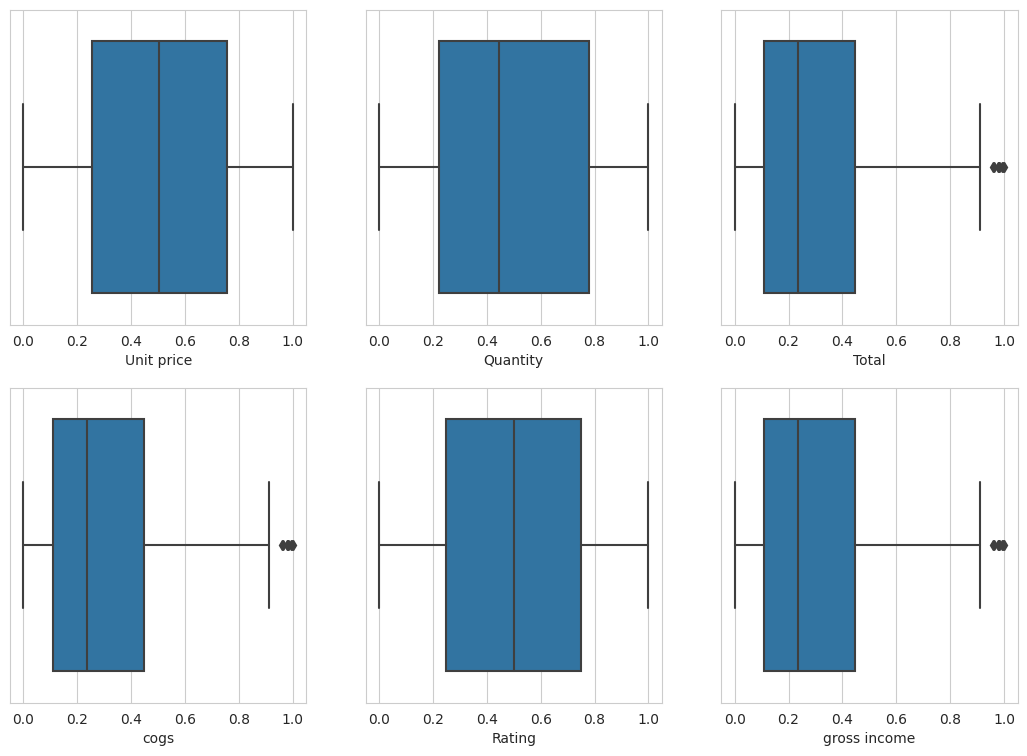

In [ ]:
plt.figure(figsize=(13,9))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=df)

##Histogram

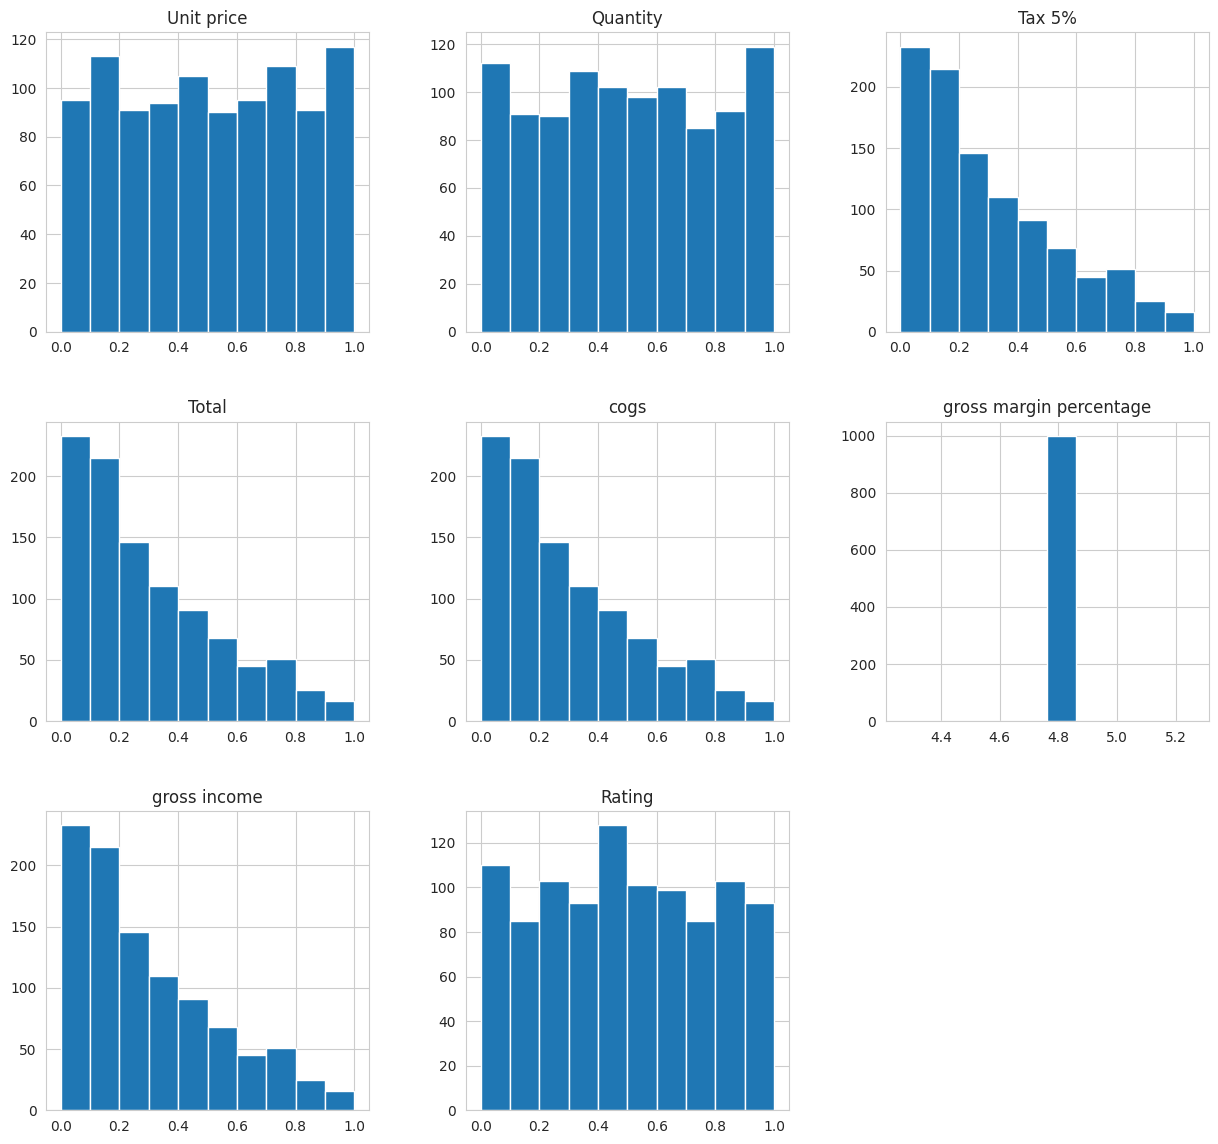

In [ ]:
df.hist(figsize=(15,14))
plt.show()

Text(0.5, 1.0, 'Distribution of Payment Methods by Store')

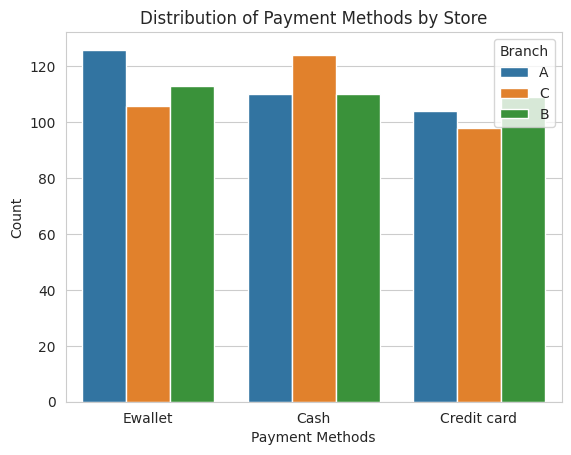

In [ ]:
# Count Plot for Payment Methods by Branch
sns.countplot(data=df, x='Payment', hue='Branch')
plt.xlabel('Payment Methods')
plt.ylabel('Count')
plt.title('Distribution of Payment Methods by Store')

As you can see for the **C** branch, the most transactions are **cash** For branch A E-wallet, which may indicate that branch A has a well-developed website where users order products.

##Pieplot

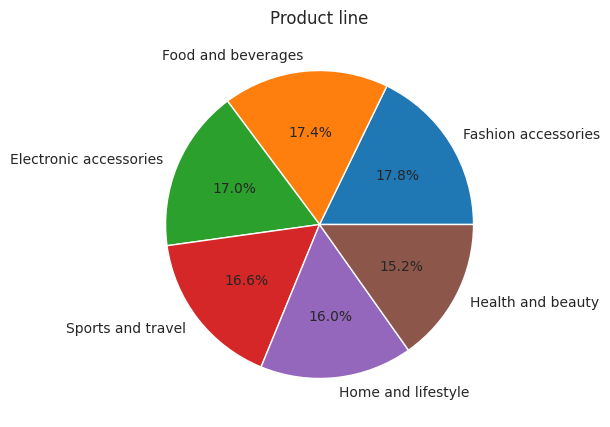

In [ ]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.set(title='Product line')
plt.pie(x=df['Product line'].value_counts(),autopct='%.1f%%',labels=df['Product line'].value_counts().index)
plt.show()

**More** product on Fashion accessories
**Less** product on Health and beauty

>



#4-ML algorithm

In [ ]:
#Heatmap using Seaborn
#Create the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

                         Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity                   0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                     0.633962  0.705510  1.000000  1.000000  1.000000   
Total                      0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633962  0.705510  1.000000  1.000000  1.000000   
Rating                    -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.633962 -0.008778  
Quantity                                     NaN      0.705510 -0.015815  
Tax 5%                                       NaN      1.000000 

**Problem Statement**:Given above data build a machine

learning model that can predict Total Sales based on quantity


In [ ]:
  #The target variable("Total")
  #Relevent feature => Quantity and Unit price


##Linear Regression

In [ ]:
x=df['Quantity']
y=df['Total']#target


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Assuming you have X and y defined before this point
# Split the data into training and testing sets
x=df[['Quantity']]
y=df['Total']#target
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Initialize the Linear Regression model
lr = LinearRegression()
# Train the model
lr.fit(x_train,y_train)
# Make predictions on the test set
predictions = lr.predict(x_test)
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')



Mean Absolute Error (MAE): 0.13409469567322052
Mean Squared Error (MSE): 0.030142837572590845
R-squared (R2): 0.5065852654178085
